<a href="https://colab.research.google.com/github/alzimna/ara/blob/main/Code/ara_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas plotly

In [2]:
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# **Data dari USK**

# Government Building Distribution

In [3]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Goverment%20Building%20Distribution/Goverment_Bulding_Distribution.shx"
gov = gpd.read_file(url)
gov.head()

,Name,Keterangan,Ket,geometry
0,BPDAS Kapuas,BMDK,District-Owned Properties / BMDK,POINT Z (109.35518 -0.06307 0)
1,Pengadilan Tinggi Agama Pontianak,BMN,Stated-Owned Properties / BMDP,POINT Z (109.35536 -0.06323 0)
2,BKKBN Kalimantan Barat,BMDP,Provincial-Owned Properties / BMDP,POINT Z (109.36501 -0.06062 0)
3,UPT BP2MI Kalimantan Barat,BMN,Stated-Owned Properties / BMDP,POINT Z (109.31874 -0.03618 0)
4,Kementrian Keuangan Republik Indonesia Direkto...,BMN,Stated-Owned Properties / BMDP,POINT Z (109.33999 -0.04888 0)


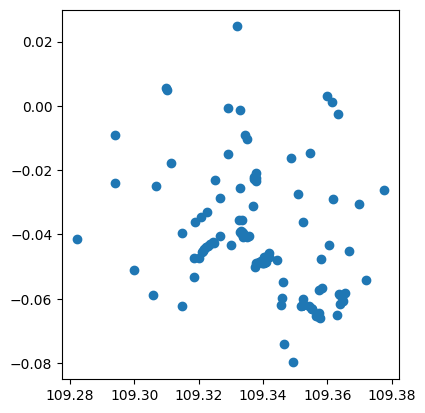

In [4]:
import matplotlib.pyplot as plt
gov.plot()
plt.show()

# Land Cover

In [5]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Land_Cover/Land_Cover_Pontianak.shx"
landcov = gpd.read_file(url)
landcov.head()

,OBJECTID,FID_LandCo,pl17_id,desc_in,n,FID_Tanah_,FAOSOIL,DOMSOI,Jns_Tnh,Tanah_Umum,CN,S,Ia,Shape_Leng,Shape_Area,geometry
0,1,0,2010,Perkebunan,0.45,45,Jd9-2/3a,Jd,Entisol,Lempung Berliat,78.0,72,14,4091.079809,5.398489e+05,"MULTIPOLYGON (((321753.599 10003431.897, 32177..."
1,2,1,20051,Hutan Rawa Sekunder,0.12,45,Jd9-2/3a,Jd,Entisol,Lempung Berliat,77.0,76,15,1221.272328,2.643175e+04,"POLYGON ((316009.57 10004970.774, 316028.367 1..."
2,3,2,20071,Belukar Rawa,0.08,85,Od19-a,Od,Vertisol,Liat Berdebu,89.0,31,6,72867.947312,2.400039e+07,"MULTIPOLYGON (((310641.166 9985210.783, 310623..."
3,4,3,20091,Pertanian Lahan Kering,0.05,45,Jd9-2/3a,Jd,Entisol,Lempung Berliat,88.0,35,7,342208.420490,1.006952e+08,"MULTIPOLYGON (((306686.637 9985627.118, 306880..."
4,5,3,20091,Pertanian Lahan Kering,0.05,85,Od19-a,Od,Vertisol,Liat Berdebu,91.0,25,5,172256.843541,5.234579e+07,"MULTIPOLYGON (((311777.91 9984991.667, 311252...."


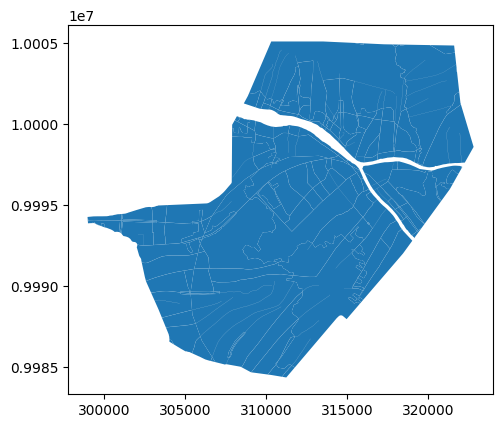

In [6]:
import matplotlib.pyplot as plt
landcov.plot()
plt.show()

yang digenerate oleh USK bukan map sebenarnya, bisa dilihat dari multipolygonnya

# **Mengolah data dari Geofabrik**

In [7]:
!pip install osmium

In [8]:
import osmium
import shapely.wkb
import pandas as pd
import geopandas as gpd
import requests

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

class AdminAreaHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)

        self.areas = []
        self.wkbfab = osmium.geom.WKBFactory()

    def area(self, a):
        if  "admin_level" in a.tags:

            wkbshape = self.wkbfab.create_multipolygon(a)
            shapely_obj = shapely.wkb.loads(wkbshape, hex=True)

            area = { "id": a.id, "geo": shapely_obj }
            area = merge_two_dicts(area, a.tags)

            self.areas.append(area)

handler = AdminAreaHandler()

# path to file to local drive
# download from https://download.geofabrik.de/index.html


url = "https://github.com/alzimna/ara/raw/refs/heads/main/kalimantan-260118.osm.pbf"
local_file = "kalimantan-260118.osm.pbf"

r = requests.get(url, stream=True)
with open(local_file, "wb") as f:
    for chunk in r.iter_content(chunk_size=8192):
        f.write(chunk)

handler.apply_file(local_file, locations=True, idx='flex_mem')


df = pd.DataFrame(handler.areas)
kalimantan = gpd.GeoDataFrame(df, geometry="geo")
kalimantan

,id,geo,addr:city,addr:full,addr:housenumber,addr:postcode,addr:street,admin_level,building,building:levels,...,border_type:id,old_name,start_date,wikipedia:en,name:jv,name:mn,name:br,short_name:uk,sport,school:type_idn
0,454162402,"MULTIPOLYGON (((116.98968 -0.41323, 116.98968 ...",Kabupaten Kutai Kartanegara,"JL. Sutoyo, Panji, Kalimantan Timur",26,75513,Jalan Pangeran Diponegoro,5,yes,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,470823010,"MULTIPOLYGON (((116.83447 -1.26818, 116.83466 ...",NaN,Jl. Telaga Sari,NaN,NaN,NaN,5,yes,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,472266414,"MULTIPOLYGON (((114.78481 -3.8027, 114.78487 -...",NaN,Jl. A. Syairani,NaN,NaN,NaN,5,yes,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,472918222,"MULTIPOLYGON (((114.76935 -3.76899, 114.77045 ...",NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488078414,"MULTIPOLYGON (((115.81819 3.10217, 115.81825 3...",NaN,NaN,NaN,NaN,NaN,7,village_office,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2816991706,"MULTIPOLYGON (((116.26868 -1.44862, 116.26868 ...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2320,29842181,"MULTIPOLYGON (((116.17486 1.89729, 116.17552 1...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,19768921,"MULTIPOLYGON (((117.51449 3.38413, 117.51451 3...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2322,32471789,"MULTIPOLYGON (((116.83665 -1.27558, 116.83668 ...",NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Map kota Pontianak**

# versi USK

In [9]:
url = "https://github.com/alzimna/ara/raw/refs/heads/main/District%20Administrative%20Boundary/District_Administrative_Boundary.shx"

pontianak = gpd.read_file(url)
pontianak

,Kabupaten,geometry
0,Kota Pontianak,"POLYGON ((318580.157 10001017.17, 318599.284 1..."


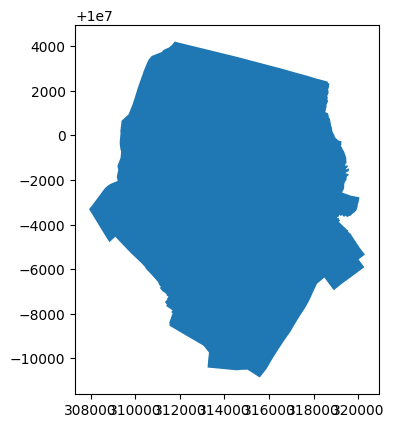

In [10]:
import matplotlib.pyplot as plt
pontianak.plot()
plt.show()

# versi OSM

<Axes: >

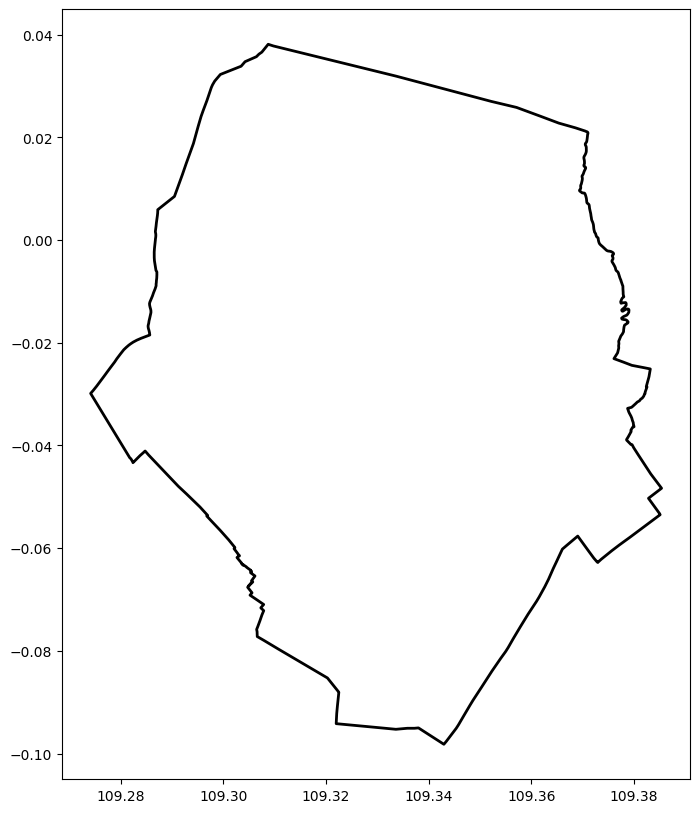

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ponti = kalimantan[(kalimantan["official_name"]=="Kota Pontianak")]
ponti.set_crs("EPSG:23850").plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

# # admin level 4 boundaries
# admin_level_4_gdf = gdf[(in_ukraine & (gdf.admin_level=="4") & (~gdf["ISO3166-2"].isna()))].set_crs(crs=4326)
# admin_level_4_gdf.plot(ax=ax, alpha=.1, facecolor='b', edgecolor="#000", linewidth=1)

# # add labels
# for idx, row in admin_level_4_gdf.iterrows():
#     ax.annotate(text=row["name:en"], xy=(row.geo.centroid.x, row.geo.centroid.y), horizontalalignment='center')#, xy=row.geo.centroid)


# **Map berdasarkan kecamatan**

# versi USK

In [12]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Sub-District%20Administrative%20Boundary/Subdistrict_Administration_Boundary.shx"

kecamatan = gpd.read_file(url)
kecamatan

,kecamatan,Kabupaten,geometry
0,Pontianak Barat,Kota Pontianak,"POLYGON ((309531.765 10000595.14, 309533.122 1..."
1,Pontianak Kota,Kota Pontianak,"POLYGON ((315020.861 9998074.922, 315063.218 9..."
2,Pontianak Selatan,Kota Pontianak,"POLYGON ((315923.934 9997058.075, 315953.752 9..."
3,Pontianak Tenggara,Kota Pontianak,"POLYGON ((317998.325 9994324.297, 318026.516 9..."
4,Pontianak Timur,Kota Pontianak,"POLYGON ((320027.546 9997037.659, 319973.045 9..."
5,Pontianak Utara,Kota Pontianak,"POLYGON ((318580.157 10001017.17, 318599.284 1..."


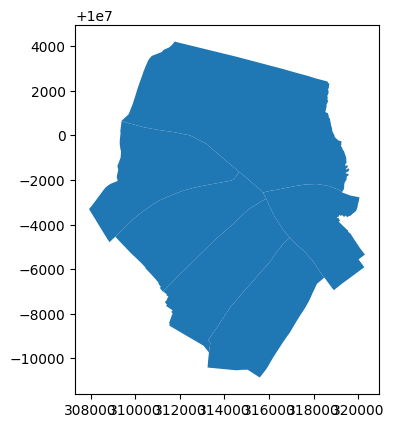

In [13]:
import matplotlib.pyplot as plt
kecamatan.plot()
plt.show()

# versi OSM

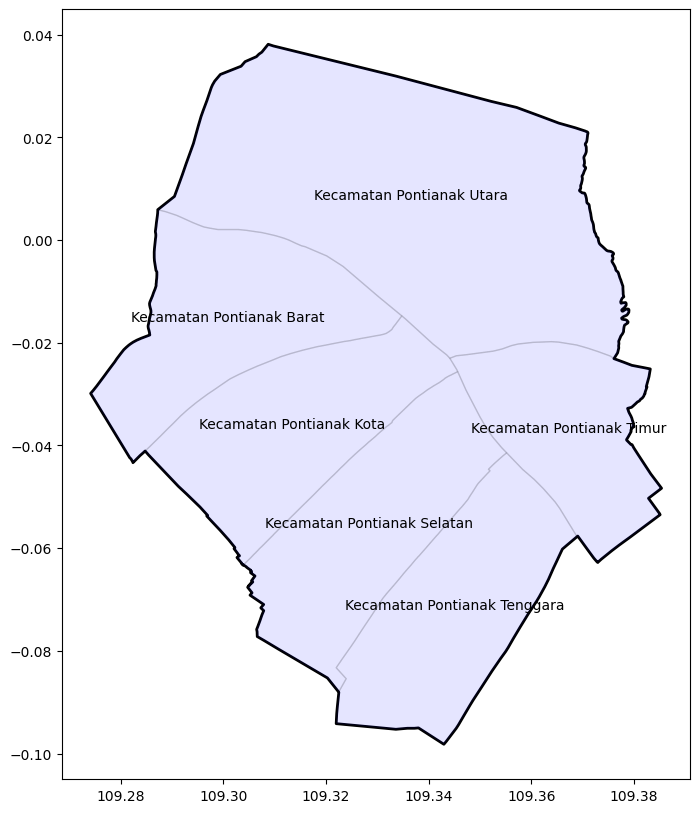

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

kalimantan[(kalimantan["official_name"]=="Kota Pontianak")].set_crs("EPSG:23850").plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

cek = []
for i in range(len(kalimantan)) :
  temp = kalimantan["official_name"].iloc[i]
  if "Kecamatan Pontianak" in str(temp) :
    cek.append(i)
kec = kalimantan.iloc[cek].set_crs("EPSG:23850")
kec.plot(ax=ax, alpha=.1, facecolor='b', edgecolor="#000", linewidth=1)

# add labels
for idx, row in kec.iterrows():
    ax.annotate(text=row["official_name"], xy=(row.geo.centroid.x, row.geo.centroid.y), horizontalalignment='center')#, xy=row.geo.centroid)

# **Map berdasarkan desa**


# versi USK

In [15]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Village%20Administrative%20Boundary/Village_Administrative_Boundary.shx"
desa_usk = gpd.read_file(url)
desa_usk

,nmdesa,kecamatan,Kabupaten,geometry
0,Banjar Serasan,Pontianak Timur,Kota Pontianak,"POLYGON ((317035.075 9995851.982, 317063.921 9..."
1,Dalam Bugis,Pontianak Timur,Kota Pontianak,"POLYGON ((316297.478 9997336.861, 316317.258 9..."
2,Parit Mayor,Pontianak Timur,Kota Pontianak,"POLYGON ((320241.503 9994739.36, 320249.128 99..."
3,Saigon,Pontianak Timur,Kota Pontianak,"POLYGON ((319130.458 9996250.924, 319165.423 9..."
4,Tambelan Sampit,Pontianak Timur,Kota Pontianak,"POLYGON ((316179.331 9996893.203, 316218.042 9..."
5,Tanjung Hilir,Pontianak Timur,Kota Pontianak,"POLYGON ((317816.227 9997689.125, 317816.175 9..."
6,Tanjung Hulu,Pontianak Timur,Kota Pontianak,"POLYGON ((319270.818 9997488.753, 319294.027 9..."
7,Bangka Belitung Darat,Pontianak Tenggara,Kota Pontianak,"POLYGON ((315065.348 9989475.307, 315139.257 9..."
8,Bangka Belitung Laut,Pontianak Tenggara,Kota Pontianak,"POLYGON ((317635.475 9992323.917, 317582.496 9..."
9,Bansir Darat,Pontianak Tenggara,Kota Pontianak,"POLYGON ((315065.138 9989475.442, 315063.475 9..."


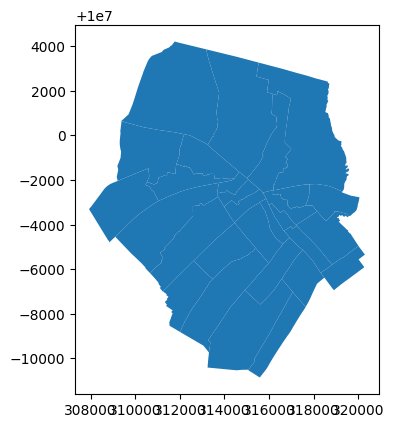

In [16]:
import matplotlib.pyplot as plt
desa_usk.plot()
plt.show()

# versi OSM

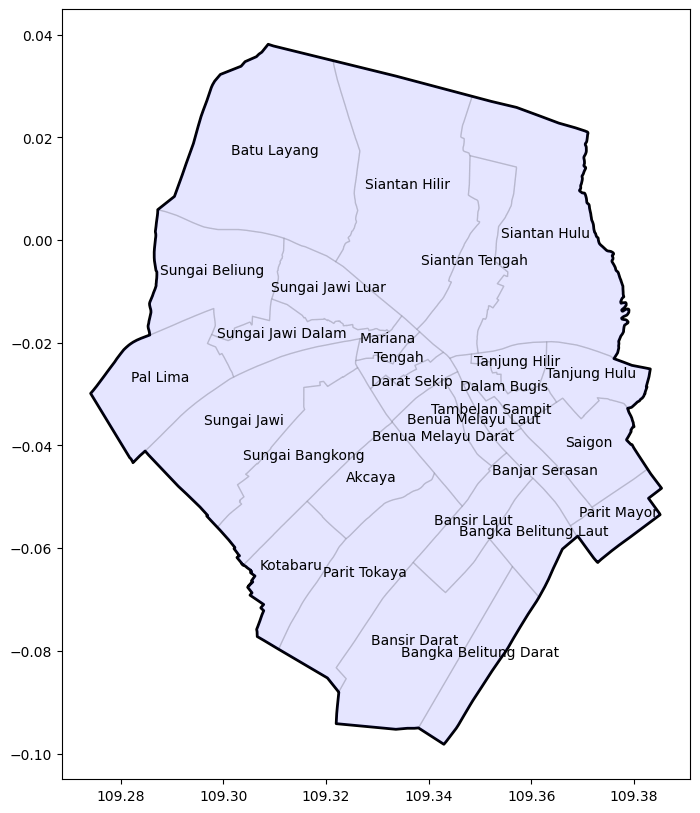

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

kalimantan[(kalimantan["official_name"]=="Kota Pontianak")].set_crs("EPSG:23850").plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

cek = []
for i in range(len(kalimantan)) :
  temp = kalimantan["wikipedia"].iloc[i]
  if "Pontianak" in str(temp) :
    cek.append(i)
  # if "Saigon" in str(temp) :
  #   cek.append(i)

desa = kalimantan.iloc[cek]
desa = desa[(desa["place"]=="village") | (desa["name"]=="Saigon")]
desa.set_crs("EPSG:23850").plot(ax=ax, alpha=.1, facecolor='b', edgecolor="#000", linewidth=1)

# add labels
for idx, row in desa.iterrows():
    ax.annotate(text=row["name"], xy=(row.geo.centroid.x, row.geo.centroid.y), horizontalalignment='center')#, xy=row.geo.centroid)

# **Building**

# versi USK

In [18]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Building/Building_Footprint_Pontianak.shx"
building_usk = gpd.read_file(url)
building_usk.head()

,osm_id,osm_type,addr_stree,building,military,office,government,landuse,name,access_roo,building_m,isced_leve,addr_house,capacity,roof_mater,amenity,emergency,Kecamatan,geometry
0,574155598.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.28768 7.4e-5 0, 109.28778 5.54..."
1,574155627.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.28727 1.56615e-5 0, 109.28726 ..."
2,574155454.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.2868 0.00017 0, 109.28678 1.71..."
3,574155596.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.28779 0.00011 0, 109.28779 7.0..."
4,573354340.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Timur,"POLYGON Z ((109.36338 -0.04253 0, 109.36329 -0..."


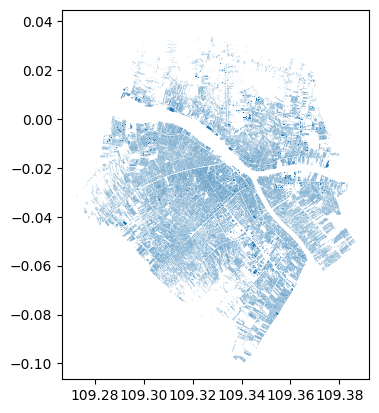

In [19]:
building_usk.plot()
plt.show()

# Versi geofabrik (osm based)

In [20]:
# import fiona

# url = "https://github.com/alzimna/ara/raw/refs/heads/main/kalimantan-260119-free.shp/gis_osm_buildings_a_free_1.shx"
# fiona.listlayers(url)

In [21]:
# building = gpd.read_file(url)
# print(building.head())

In [22]:
# building.info()

In [23]:
# building["type"].unique()

## cek apakah beririsan dengan pontianak

In [24]:
# cek = []
# luar = ponti.iloc[0]["geo"]

# for i in range(len(building)) :
#   dalam = building.iloc[i]["geometry"]
#   if dalam.intersects(luar) :
#     cek.append(i)
# pontianak2 = building.iloc[cek]

kalau pakai within dapat data 150837, kalau pakai intersects dapat 150947

In [25]:
# pontianak2.to_file("building_from_geofabrik.shp")

In [26]:
import pandas as pd
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Building_Geofabrik/building_from_geofabrik.shp"
building_geofabrik = gpd.read_file(url)
building_geofabrik = building_geofabrik[building_geofabrik["geometry"].notna()]
building_geofabrik

,osm_id,code,fclass,name,type,geometry
0,123177072,1500,building,Ayani Mega Mall,commercial,"POLYGON ((109.34421 -0.05176, 109.34431 -0.051..."
1,155153671,1500,building,Gayatri,None,"POLYGON ((109.35566 -0.06503, 109.35574 -0.064..."
2,174086491,1500,building,None,None,"POLYGON ((109.32721 -0.01825, 109.32742 -0.018..."
3,174086493,1500,building,Rumah Duka St. Michael,None,"POLYGON ((109.32757 -0.01917, 109.32788 -0.019..."
4,174086496,1500,building,None,None,"POLYGON ((109.32765 -0.01977, 109.32765 -0.019..."
...,...,...,...,...,...,...
150942,1457486452,1500,building,None,None,"POLYGON ((109.34341 -0.06879, 109.34355 -0.068..."
150943,1457486453,1500,building,None,None,"POLYGON ((109.34406 -0.06933, 109.3441 -0.0693..."
150944,1457486454,1500,building,None,None,"POLYGON ((109.34393 -0.06941, 109.34405 -0.069..."
150945,1457491875,1500,building,None,None,"POLYGON ((109.3338 -0.0238, 109.33382 -0.02375..."


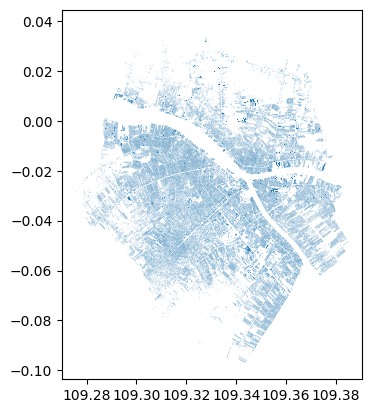

In [27]:
building_geofabrik.plot()
plt.show()

# **Menambahkan wilayah administrasi**

# **Data USK**

## Tambah kota

In [28]:
building_usk = building_usk.drop(columns=["Kecamatan"])
building_usk = building_usk[building_usk["geometry"].notna()].copy()
building_usk.loc[:, "Kota"] = "Kota Pontianak"

## Tambah Kecamatan

In [29]:
joined = gpd.sjoin(
    building_usk,
    kec[["geo", "official_name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"official_name": "Kecamatan"})
joined = joined.drop(columns=["index_right"])
building_usk = joined.copy()

/tmp/ipython-input-1380628996.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:23850

  joined = gpd.sjoin(


## Tambah Desa

In [30]:
joined = gpd.sjoin(
    building_usk,
    desa[["geo", "name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"name_right": "Desa"})
joined = joined.drop(columns=["index_right"])
building_usk = joined.copy()

/tmp/ipython-input-283317477.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined = gpd.sjoin(


In [31]:
building_usk

,osm_id,osm_type,addr_stree,building,military,office,government,landuse,name_left,access_roo,...,isced_leve,addr_house,capacity,roof_mater,amenity,emergency,geometry,Kota,Kecamatan,Desa
0,574155598.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.28768 7.4e-5 0, 109.28778 5.54...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
1,574155627.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.28727 1.56615e-5 0, 109.28726 ...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
2,574155454.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.2868 0.00017 0, 109.28678 1.71...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
3,574155596.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.28779 0.00011 0, 109.28779 7.0...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
4,573354340.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.36338 -0.04253 0, 109.36329 -0...",Kota Pontianak,Kecamatan Pontianak Timur,Banjar Serasan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182359,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.3447 -0.01076 0, 109.34475 -0....",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Tengah
182360,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.34112 -0.00797 0, 109.34122 -0...",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Hilir
182361,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.34109 -0.00829 0, 109.34124 -0...",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Hilir
182362,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.34427 -0.00855 0, 109.34432 -0...",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Tengah


# **Data geofabrik (osm based)**

## Tambah kota

In [32]:
building_geofabrik = building_geofabrik[building_geofabrik["geometry"].notna()].copy()
building_geofabrik.loc[:, "Kota"] = "Kota Pontianak"

## Tambah Kecamatan

In [33]:
joined = gpd.sjoin(
    building_geofabrik,
    kec[["geo", "official_name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"official_name": "Kecamatan"})
joined = joined.drop(columns=["index_right"])
building_geofabrik = joined.copy()

/tmp/ipython-input-2731055398.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:23850

  joined = gpd.sjoin(


In [34]:
building_geofabrik.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 150949 entries, 0 to 150946
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   osm_id     150949 non-null  object  
 1   code       150949 non-null  int32   
 2   fclass     150949 non-null  object  
 3   name       1085 non-null    object  
 4   type       1603 non-null    object  
 5   geometry   150949 non-null  geometry
 6   Kota       150949 non-null  object  
 7   Kecamatan  150949 non-null  object  
dtypes: geometry(1), int32(1), object(6)
memory usage: 9.8+ MB


## Tambah Desa

In [35]:
joined = gpd.sjoin(
    building_geofabrik,
    desa[["geo", "name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"name_right": "Desa"})
joined = joined.drop(columns=["index_right"])
building_geofabrik = joined.copy()

/tmp/ipython-input-3121697277.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined = gpd.sjoin(


In [36]:
building_geofabrik.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 151344 entries, 0 to 150946
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   osm_id     151344 non-null  object  
 1   code       151344 non-null  int32   
 2   fclass     151344 non-null  object  
 3   name_left  1086 non-null    object  
 4   type       1603 non-null    object  
 5   geometry   151344 non-null  geometry
 6   Kota       151344 non-null  object  
 7   Kecamatan  151344 non-null  object  
 8   Desa       151344 non-null  object  
dtypes: geometry(1), int32(1), object(7)
memory usage: 11.0+ MB


In [37]:
building_geofabrik

,osm_id,code,fclass,name_left,type,geometry,Kota,Kecamatan,Desa
0,123177072,1500,building,Ayani Mega Mall,commercial,"POLYGON ((109.34421 -0.05176, 109.34431 -0.051...",Kota Pontianak,Kecamatan Pontianak Selatan,Parit Tokaya
1,155153671,1500,building,Gayatri,None,"POLYGON ((109.35566 -0.06503, 109.35574 -0.064...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bangka Belitung Darat
2,174086491,1500,building,None,None,"POLYGON ((109.32721 -0.01825, 109.32742 -0.018...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Jawi Dalam
3,174086493,1500,building,Rumah Duka St. Michael,None,"POLYGON ((109.32757 -0.01917, 109.32788 -0.019...",Kota Pontianak,Kecamatan Pontianak Kota,Mariana
4,174086496,1500,building,None,None,"POLYGON ((109.32765 -0.01977, 109.32765 -0.019...",Kota Pontianak,Kecamatan Pontianak Kota,Mariana
...,...,...,...,...,...,...,...,...,...
150942,1457486452,1500,building,None,None,"POLYGON ((109.34341 -0.06879, 109.34355 -0.068...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bansir Darat
150943,1457486453,1500,building,None,None,"POLYGON ((109.34406 -0.06933, 109.3441 -0.0693...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bansir Darat
150944,1457486454,1500,building,None,None,"POLYGON ((109.34393 -0.06941, 109.34405 -0.069...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bansir Darat
150945,1457491875,1500,building,None,None,"POLYGON ((109.3338 -0.0238, 109.33382 -0.02375...",Kota Pontianak,Kecamatan Pontianak Kota,Tengah
